# I- Boston Housing Dataset (No Missing Values)

Here I am using Boston Housing Dataset, which is used for regression problems. This dataset contains information about various houses in Boston through different parameters. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

'CRIM': This is the per capita crime rate by town.

'ZN': This is the proportion of residential land zoned for lots over 25,000 sq. ft.

'INDUS': This is the proportion of non-retail business acres per town.

'CHAS': This is a Charles River dummy variable (this is equal to 1 if the tract bounds the river; 0 otherwise).

'NOX': This is the nitric oxides concentration (parts per 10 million).

'RM': This is the average number of rooms per house.

'AGE': This is the proportion of owner-occupied units built prior to 1940.

'DIS': This is the weighted distances to five Boston employment centers.

'RAD': This is the index of accessibility to radial highways.

'TAX': This is the full-value property tax rate per $10,000.

'PTRATIO': This is the pupil-teacher ratio by town.

'B': This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town.

'LSTAT': This is the percentage of lower status of the population.

'PRICE': This is the median value of owner-occupied homes in $1000s and is the target variable in this dataset.

In [35]:
# Load libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
boston_dataset = load_boston()

# Create a DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Add target to the DataFrame
boston['PRICE'] = boston_dataset.target

# Display the shape
print("Shape of the DataFrame: ", boston.shape)

# Display the first 5 rows
boston.head()

Shape of the DataFrame:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 1 - Data Preprocessing

In our case, the Boston dataset is already fairly clean. If you wanted to check for missing values, you could use the following command:

In [3]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# 2- Exploratory Data Analysis

In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


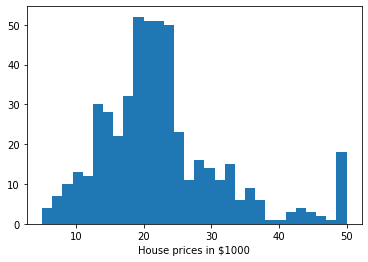

In [6]:
plt.hist(boston['PRICE'], bins=30)
plt.xlabel('House prices in $1000')
plt.show()

In [7]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

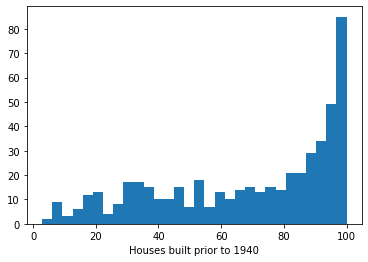

In [8]:
plt.hist(boston['AGE'], bins=30)
plt.xlabel('Houses built prior to 1940')
plt.show()

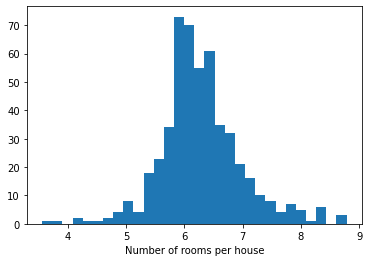

In [9]:
plt.hist(boston['RM'], bins=30)
plt.xlabel('Number of rooms per house')
plt.show()

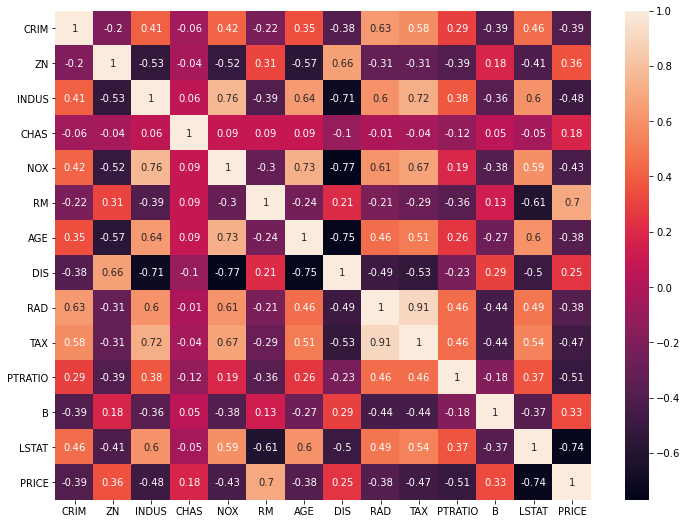

In [10]:
# Now let us check the correlation between the features

# Increase the size of the heatmap.
plt.figure(figsize=(12, 9))

# Create a correlation matrix
corr_matrix = boston.corr().round(2)

# Draw the heatmap
sns.heatmap(data=corr_matrix, annot=True)

# Show the plot
plt.show()

# 3- Model Selection & Training

# 3-a Linear Regression

In [11]:
# We'll predict the 'PRICE' column
y = boston['PRICE']
X = boston.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

# Create a Linear Regression object
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on the test set
y_pred = lm.predict(X_test)

# Hyperparameter Tuning

Linear Regression does not really have any critical hyperparameters to tune. If we were using a model that did, like a RandomForestRegressor or GradientBoostingRegressor, we would use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.

# 3- b Random Forest Regressor

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}
rf = RandomForestRegressor(random_state = 42)
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)
CV_rf.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

# Model Evaluation

Finally, we need to evaluate the performance of our model:

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

30.697037704088583


# 3-c Gradient Boosting Regressor Model

# i) Splitting The Dataset

In [14]:
from sklearn.model_selection import train_test_split

# We'll predict the 'PRICE' column
y = boston['PRICE']
X = boston.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# ii) Model Training

In [18]:
# Instantiate the model
gbr = GradientBoostingRegressor(random_state=42)

# Fit the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# iii) Hyperparameter Tuning

In [19]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.7, 1.0],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.5}


In [20]:
# Instantiate a new GradientBoostingRegressor with the best parameters
best_gbr = GradientBoostingRegressor(**best_params, random_state=42)

# Fit the model to the training data
best_gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_gbr.predict(X_test)

# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error of Best Model: {mse_best}")

Mean Squared Error of Best Model: 9.507307934980508


# II- Titanic Dataset

# 1- Load Dataset

In [24]:
# Load the dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# Check for missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# 2- Data Preprocessing

In [26]:
# Check info of this dataset 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Remark:

In this step, we'll handle the missing values. There are several strategies for this like dropping the rows with missing values, filling with mean/median/mode, or using an imputation method.

We have missing values for these features, "age": "num", "embarked": "Obj","deck":"Category","embark_town":"Obj",

In [27]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [30]:
# Fill missing values in 'age' with the mean age
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# Drop the 'deck' column which has many missing values
titanic.drop('deck', axis=1, inplace=True)

# Drop other rows with missing values
titanic.dropna(inplace=True)

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [32]:
# Check NA
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [37]:
# First, let's identify the categorical columns
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns

# Then, print the unique values in each categorical column
for col in categorical_cols:
    print(f"{col}: {titanic[col].unique()}")

sex: ['male' 'female']
embarked: ['S' 'C' 'Q']
class: ['Third', 'First', 'Second']
Categories (3, object): ['Third', 'First', 'Second']
who: ['man' 'woman' 'child']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown']
alive: ['no' 'yes']


In [38]:
# Convert Categorical to Numerical
categorical_cols = titanic.select_dtypes(include=['object', 'category']).columns
titanic_numerical = pd.get_dummies(titanic, columns=categorical_cols)

In [39]:
titanic_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   pclass                   889 non-null    int64  
 2   age                      889 non-null    float64
 3   sibsp                    889 non-null    int64  
 4   parch                    889 non-null    int64  
 5   fare                     889 non-null    float64
 6   adult_male               889 non-null    bool   
 7   alone                    889 non-null    bool   
 8   sex_female               889 non-null    uint8  
 9   sex_male                 889 non-null    uint8  
 10  embarked_C               889 non-null    uint8  
 11  embarked_Q               889 non-null    uint8  
 12  embarked_S               889 non-null    uint8  
 13  class_First              889 non-null    uint8  
 14  class_Second             8

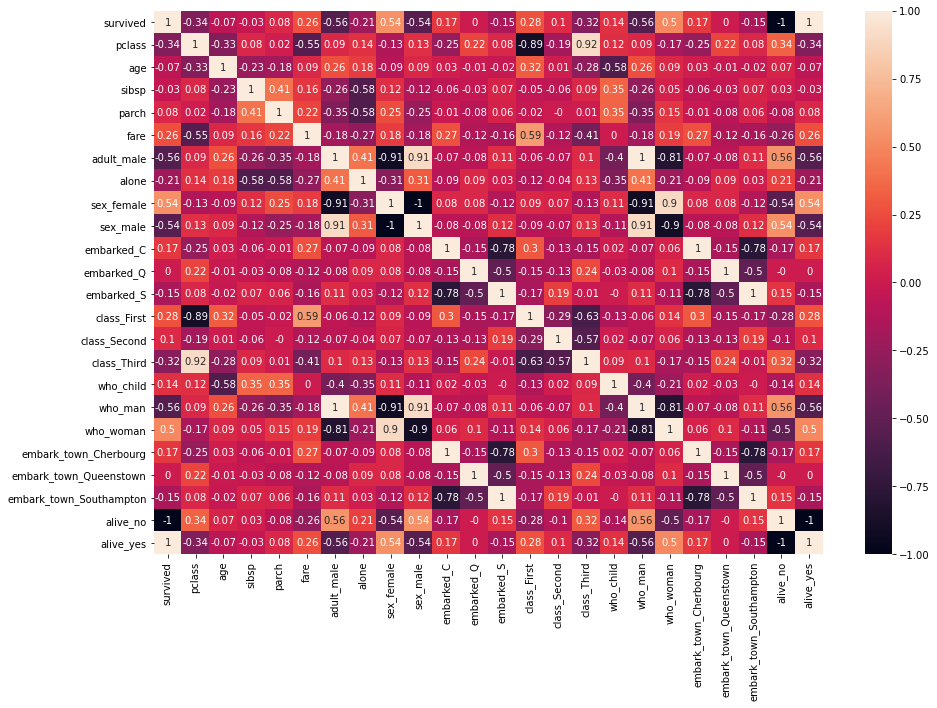

In [41]:
# Now let us check the correlation between the features

# Increase the size of the heatmap.
plt.figure(figsize=(15, 10))

# Create a correlation matrix
corr_matrix = titanic_numerical.corr().round(2)

# Draw the heatmap
sns.heatmap(data=corr_matrix, annot=True)

# Show the plot
plt.show()

# Split the dataset

In [43]:
# We'll predict the 'survived' column
y = titanic_numerical['survived']
X = titanic_numerical.drop('survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Model selection and training

In [44]:

# Instantiate the model
lr = LogisticRegression(random_state=42, max_iter=500)

# Fit the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Compute accuracy
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  1.0


# Hyperparameter Tuning

In [45]:
# Initialize a Logistic Regression model
log_reg = LogisticRegression()

# Define a parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70323488        nan 0.99578059        nan 0.92405063
        nan 0.99578059        nan 1.                nan 0.99578059
        nan 1.                nan 0.99578059        nan 1.
        nan 0.99578059        nan 1.                nan 0.99578059]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=2)

In [46]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [47]:
# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy of the model is: ", accuracy)

The accuracy of the model is:  1.0


# Remark:

Here we already have an accuracy of 1, so Hyperparameter tuning is not needed.

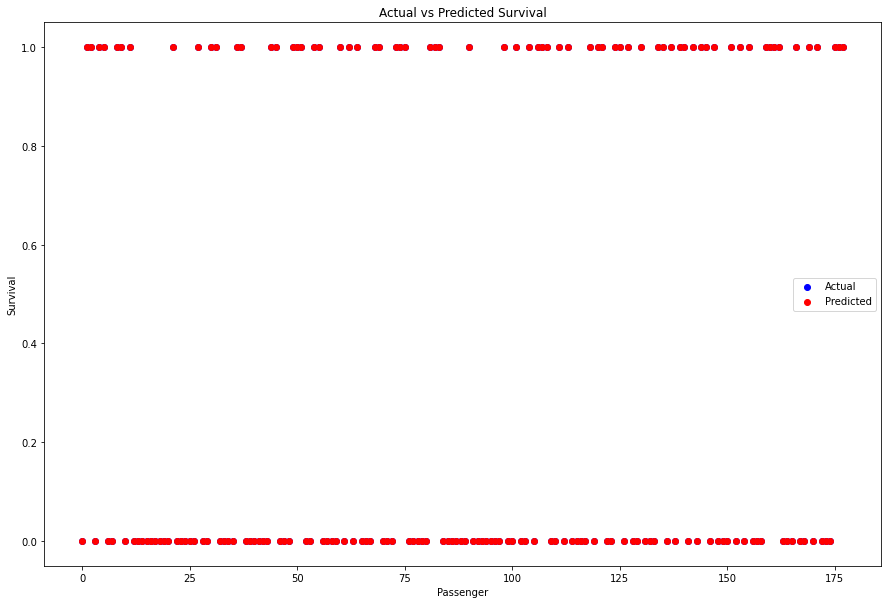

In [50]:
# Let us generate some plots

# Create a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')

# Customize the plot
plt.title('Actual vs Predicted Survival')
plt.xlabel('Passenger')
plt.ylabel('Survival')
plt.legend()

# Show the plot
plt.show()